# Chapter 11 逆行列

## 11.1 左逆行列，右逆行列

左逆行列と右逆行列を求める方法は，後ほど説明する．


In [1]:
A = [-3 -4; 4 6; 1 1]

3×2 Array{Int64,2}:
 -3  -4
  4   6
  1   1

In [2]:
B = [ -11 -10 16; 7 8 -11 ] / 9  # Aの左逆行列

2×3 Array{Float64,2}:
 -1.22222   -1.11111    1.77778
  0.777778   0.888889  -1.22222

In [3]:
C = [0 -1 6; 0 1 -4] / 2 # これもAの左逆行列

2×3 Array{Float64,2}:
 0.0  -0.5   3.0
 0.0   0.5  -2.0

In [4]:
B * A # それではチェック

2×2 Array{Float64,2}:
  1.0          0.0
 -4.44089e-16  1.0

In [5]:
C * A

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

## 11.1 逆行列

もし`A`の逆行列が存在すれば，それは`inv(A)`で得られる（`A^-1`と書いてもよい）．`A`に逆行列が存在しなかったり，`A`が正方行列でなければ，エラーになる．


In [6]:
A = [1 -2 3; 0 2 2; -4 -4 -4]

3×3 Array{Int64,2}:
  1  -2   3
  0   2   2
 -4  -4  -4

In [7]:
B = inv(A)

3×3 Array{Float64,2}:
  0.0  -0.5  -0.25
 -0.2   0.2  -0.05
  0.2   0.3   0.05

In [8]:
B * A

3×3 Array{Float64,2}:
 1.0  0.0          0.0        
 0.0  1.0          2.77556e-17
 0.0  5.55112e-17  1.0        

In [9]:
A * B

3×3 Array{Float64,2}:
  1.0           1.11022e-16  0.0        
  5.55112e-17   1.0          1.38778e-17
 -1.11022e-16  -2.22045e-16  1.0        


### 双対基底

次のコードは，逆行列$B = A^{-1}$の行が双対基底となることを示す例である．$3 \times 3$の例について，
$$
x = (b_1^T x) a_1 + \cdots + (b_n^T x) a_n
$$
を展開しよう（本書？？？？ページ参照）

In [10]:
A = [ 1 0 1; 4 -3 -4; 1 -1 -2]

3×3 Array{Int64,2}:
 1   0   1
 4  -3  -4
 1  -1  -2

In [11]:
B = inv(A)

3×3 Array{Float64,2}:
  2.0  -1.0   3.0
  4.0  -3.0   8.0
 -1.0   1.0  -3.0

In [12]:
x = [ 0.2, -0.3, 1.2]

3-element Array{Float64,1}:
  0.2
 -0.3
  1.2

In [13]:
rhs = (B[1,:]' * x) * A[:,1] + 
      (B[2,:]' * x) * A[:,2] + 
      (B[3,:]' * x) * A[:,3]

3-element Array{Float64,1}:
  0.20000000000000018
 -0.3000000000000007 
  1.1999999999999984 

### QR分解を用いて逆行列を計算

行列$A$の逆行列は，$A$のQR分解$A=QR$を用いて$A^{-1}=R^{-1} Q^T$とできる．


In [14]:
A = randn(3, 3);

In [15]:
inv(A)

3×3 Array{Float64,2}:
 1.58248    0.0344964   1.36712 
 0.623428   0.428733    0.256972
 0.179413  -0.223665   -0.400192

In [16]:
using LinearAlgebra

In [17]:
Q, R = qr(A);

In [18]:
Q = Matrix(Q);

In [19]:
inv(R) * Q'

3×3 Array{Float64,2}:
 1.58248    0.0344964   1.36712 
 0.623428   0.428733    0.256972
 0.179413  -0.223665   -0.400192

## 11.3 連立方程式を解く

### 後退代入

後退代入（本書アルゴリズム11.1）をJuliaで実装し，確認しよう．しかしJuliaにはもっとよい組み込み機能が実装されている（あとで説明するバックスラッシュ演算子）ので，この関数は実際には不要である．この関数はここでの説明のためだけに使用する．


In [21]:
function back_subst(R,b)
n = length(b)
x = zeros(n)
for i=n:-1:1
    x[i] = (b[i] - R[i, i+1:n]' * x[i+1:n]) / R[i,i]
end
return x
end;

In [22]:
R = triu(randn(4, 4)) # ランダムな4x4上三角行列

4×4 Array{Float64,2}:
 0.831941  -1.09775    0.125064  -0.996965
 0.0       -0.217011  -2.61688    0.203057
 0.0        0.0        0.657299  -1.28929 
 0.0        0.0        0.0       -1.55825 

In [23]:
b = rand(4);

In [24]:
x = back_subst(R, b);

In [26]:
norm(R * x - b)

0.0

関数`triu`は行列の上三角部分を返す（下三角部分を0で埋める）．


### バックスラッシュ記法

Juliaのコマンドで連立方程式
$$
Ax = b
$$
を特には，`x=A\b`と書く．これは，$A$の逆行列を計算してから$b$との積を計算する`x=inv(A)*b`よりも，高速である．

In [27]:
n = 5000;
A = randn(n,n);  
b = randn(n);  # 連立方程式をランダムに設定

In [28]:
@time x1 = A \ b;

  3.628340 seconds (2.56 M allocations: 311.870 MiB, 6.74% gc time)


In [29]:
@time x1 = A \ b;

  1.875491 seconds (11 allocations: 190.812 MiB, 5.30% gc time)


In [30]:
norm(b - A * x1)

1.1649854674980262e-9

In [31]:
@time x2 = inv(A) * b;

  6.438471 seconds (14 allocations: 193.253 MiB, 0.48% gc time)


In [32]:
@time x2 = inv(A) * b;

  5.823906 seconds (13 allocations: 193.253 MiB, 0.53% gc time)


In [33]:
norm(b - A * x2)

1.1904084747191841e-9

Juliaは，$A$の性質をチェックして，最も良いアルゴリズムを選んで連立方程式を解く．例えば$A$が下三角行列であれば，後退代入を使う．以下のコードで計算時間を計測してみよう．


In [34]:
n = 5000;
b = randn(n);
A = tril(randn(n, n));  # ランダムな下三角行列

In [35]:
@time x = A \ b;

  0.044970 seconds (7 allocations: 39.313 KiB)


In [36]:
@time x = A \ b;

  0.047080 seconds (7 allocations: 39.313 KiB)


In [35]:
A = randn(n,n);  # ランダムな正方行列

In [37]:
@time x = A \ b;

  0.047776 seconds (7 allocations: 39.313 KiB)


In [38]:
@time x = A \ b;

  0.033932 seconds (7 allocations: 39.313 KiB)


In [39]:
n = 10000;
b = randn(n);
A = tril(randn(n, n));  # ランダムな下三角行列

In [40]:
@time x = A \ b;

  0.316653 seconds (7 allocations: 78.375 KiB)


In [41]:
@time x = A \ b;

  0.168793 seconds (7 allocations: 78.375 KiB)


In [42]:
A = randn(n, n);  # ランダムな正方行列

In [43]:
@time x = A \ b;

 15.124682 seconds (11 allocations: 763.092 MiB, 0.86% gc time)


In [44]:
@time x = A \ b;

 16.674503 seconds (11 allocations: 763.092 MiB, 0.60% gc time)


サイズを$n=5000$から$n=10000$へと2倍にすると，下三角行列の連立方程式を解く時間は0.04秒から1.29秒へと増大する．これはおよそ4倍の増加であり，後退代入の計算量のオーダー$n^2$と一致する．一般の連立方程式の場合，計算時間は0.16秒から9.01秒へと増大している．つまりおよそ8倍であり，（逆行列計算の）オーダー$n^3$になっている．


### 右辺が複数ある場合の factor-solve 法

連立方程式を解く場合，$A$を因子分解しておき，その因子を使って別のより簡単ないくつかの方程式を解く，という方法がある．これはfactor-solve法と呼ばれている．これの重要な応用は，右辺は異なるが係数行列は同じである複数の連立方程式を一度に計算する，というものである．


In [45]:
n = 5000;
A = randn(n, n);
B = randn(n, 2);

In [46]:
# 右辺がB[:,1]の連立方程式を解く
@time x1 = A \ B[:, 1];

  2.095233 seconds (57.70 k allocations: 193.601 MiB, 8.24% gc time)


In [47]:
@time x1 = A \ B[:, 1];

  2.128608 seconds (14 allocations: 190.850 MiB, 1.06% gc time)


In [48]:
# 右辺がB[:,2]の連立方程式を解く
@time x2 = A \ B[:, 2];

  2.060776 seconds (14 allocations: 190.850 MiB, 1.43% gc time)


In [49]:
@time x2 = A \ B[:, 2];

  2.357293 seconds (14 allocations: 190.850 MiB, 3.67% gc time)


In [50]:
# A*X = Bを解く単純な方法
@time X = [ A\B[:,1]  A\B[:,2] ];

  3.818341 seconds (233.64 k allocations: 393.169 MiB, 0.95% gc time)


In [51]:
@time X = [ A\B[:,1]  A\B[:,2] ];

  3.566205 seconds (29 allocations: 381.776 MiB, 1.29% gc time)


In [52]:
# Factor-solve法
@time X = A \ B;

  2.367875 seconds (386.56 k allocations: 209.670 MiB, 0.72% gc time)


In [53]:
@time X = A \ B;

  1.792681 seconds (11 allocations: 190.850 MiB, 1.06% gc time)



factor-solve法は，右辺が2つの場合でも，右辺が1つの場合とほとんど同じ計算時間で解を求めることができる．単純に2つの連立方程式を解いてしまうと，計算時間は2倍になってしまう．


## 11.4 例

### 多項式補間

本書の図11.1の多項式補間を計算する．以下のコードは`VMLS`パッケージの`vandermonde`と`linspace`を使っている（`linspace(a,b,n)`は，区間$[a,b]$を$n$等分した数列のベクトルを返す）．結果を図11.1に示す．

In [54]:
t = [ -1.1, -0.4, 0.2, 0.8 ];

In [55]:
using VMLS

In [56]:
A = vandermonde(t, 4)

4×4 Array{Float64,2}:
 1.0  -1.1  1.21  -1.331
 1.0  -0.4  0.16  -0.064
 1.0   0.2  0.04   0.008
 1.0   0.8  0.64   0.512

In [57]:
b1 = [ -1.0, 1.3, 1.0, 0.5 ];

In [58]:
c1 = A \ b1

4-element Array{Float64,1}:
  1.2109568793779317
 -0.8883105198894669
 -1.1096651886125566
  1.3864790180579647

In [59]:
b2 = [ 1.0, 0.0, -2.0, 0 ];

In [60]:
c2 = A \ b2

4-element Array{Float64,1}:
 -1.5412891202364887
 -3.1090546880020584
  3.3384743911059704
  3.695135274082644 

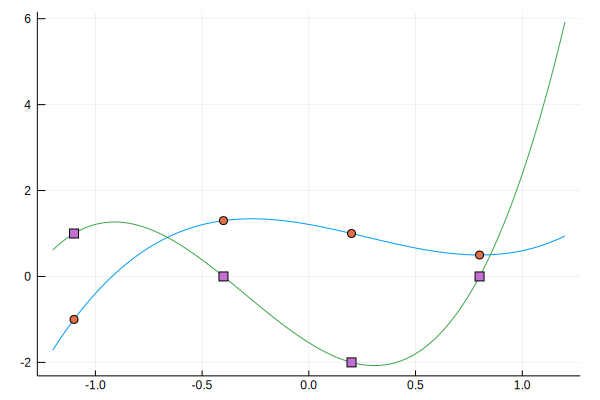

In [61]:
using Plots
ts = linspace(-1.2, 1.2, 1000);
p1 = c1[1] .+ c1[2]*ts + c1[3]*ts.^2  + c1[4]*ts.^3;
plot(ts, p1)
scatter!(t, b1)
p2 = c2[1] .+ c2[2]*ts + c2[3]*ts.^2  + c2[4]*ts.^3;
plot!(ts, p2)
scatter!(t, b2, marker = :square)
plot!(legend = false)

![図11.1](fig11-1.pdf)

図11.1 丸と四角で示した点列の3次補間


## 11.5 擬似逆行列

行列`A`の擬似逆行列はJuliaでは`pinv(A)`である．本書＊＊ページの例題のために擬似逆行列を計算するには，この関数`pinv`を使うか，公式$A^\dagger=R^{-1} Q^T$（ここで$A=QR$は行列$A$のQR分解）を使う．


In [62]:
A = [-3 -4; 4 6; 1 1]

3×2 Array{Int64,2}:
 -3  -4
  4   6
  1   1

In [63]:
pinv(A)

2×3 Array{Float64,2}:
 -1.22222   -1.11111    1.77778
  0.777778   0.888889  -1.22222

In [64]:
Q, R = qr(A);

In [65]:
Q = Matrix(Q)

3×2 Array{Float64,2}:
 -0.588348  -0.457604
  0.784465  -0.522976
  0.196116   0.719092

In [66]:
R

2×2 Array{Float64,2}:
 5.09902   7.2563  
 0.0      -0.588348

In [67]:
R \ Q' # QR分解を使った擬似逆行列

2×3 Array{Float64,2}:
 -1.22222   -1.11111    1.77778
  0.777778   0.888889  -1.22222